# Assignment 2 - Fish Prices

---
This notebook shows all the step used to answer questions of assignment 2 from [Econometrics](https://edu.epfl.ch/coursebook/fr/econometrics-FIN-403) courses.

**Author**: [Paulo Ribeiro](https://people.epfl.ch/paulo.ribeirodecarvalho)

---

## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from linearmodels.iv import IV2SLS
from IPython.display import HTML

## Load data

In [2]:
file_path = "fish.csv"
fish = pd.read_csv(file_path)
display(fish)

,avgprc,lavgprc,totqty,ltotqty,speed2,speed3,wave2,wave3,mon,tues,wed,thurs,t
0,0.700286,-0.356266,4080,8.313852,15,20,7.5,9.0,1,0,0,0,1
1,1.005336,0.005322,3466,8.150757,10,20,5.0,7.5,0,0,1,0,2
2,1.393918,0.332118,2295,7.738488,10,20,6.0,4.0,0,0,0,1,3
3,1.775487,0.574075,1870,7.533694,15,20,6.0,5.0,0,0,0,0,4
4,0.826799,-0.190194,6885,8.837100,10,20,3.5,3.5,1,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0.429408,-0.845347,3450,8.146130,15,15,4.5,3.5,1,0,0,0,93
93,0.907724,-0.096815,1230,7.114770,12,25,4.5,4.0,0,1,0,0,94
94,1.238571,0.213958,1250,7.130899,12,25,5.0,4.5,0,0,1,0,95
95,1.250000,0.223144,3980,8.289037,15,18,6.0,4.5,0,0,0,1,96


## Part 1

For the first few questions, we use the variable `lavgprc` (= the log of the average price for fish) as the dependent variable.

### a)

In [3]:
# Define the variables
y = fish['lavgprc']  # Dependent variable
X = fish[['mon', 'tues', 'wed', 'thurs', 't']]  # Independent variables

# Add a constant term for the intercept
X = sm.add_constant(X)

# Perform the regression
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                lavgprc   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     1.701
Date:                Mon, 27 Nov 2023   Prob (F-statistic):              0.142
Time:                        22:57:43   Log-Likelihood:                -45.022
No. Observations:                  97   AIC:                             102.0
Df Residuals:                      91   BIC:                             117.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0730      0.115     -0.633      0.5

***Answer:*** Statistically no evidence that price varies within a week. Indeed, p-values of week-day variables are all bigger than the 5% significance level.

### b)

In [4]:
# Define the variables
y = fish['lavgprc']  # Dependent variable
X = fish[['mon', 'tues', 'wed', 'thurs', 't', 'wave2', 'wave3']]  # Independent variables

# Add a constant term for the intercept
X = sm.add_constant(X)

# Perform the regression
model_with_wave = sm.OLS(y, X).fit()

# Display the regression results
print(model_with_wave.summary())

                            OLS Regression Results                            
Dep. Variable:                lavgprc   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     5.699
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           1.84e-05
Time:                        22:57:43   Log-Likelihood:                -31.396
No. Observations:                  97   AIC:                             78.79
Df Residuals:                      89   BIC:                             99.39
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9203      0.190     -4.848      0.0

In [5]:
# Let's see if wave2 and wave3 are jointly significant
f_test = model_with_wave.compare_f_test(model)

# Print the results
print(f"F-statistic : {f_test[0]:.3f}")
print(f"p-value : {f_test[1]:.3f}")

F-statistic : 14.436
p-value : 0.000


***Answer:*** From previous results, we see that variable `wave2` and `wave3` are individually and jointly statically significant at a $5\%$ significance level. These positives estimators can be explained by the fact that stormy seas won't allow fisher to fish. Although fewer fish are available for sale, the demand during this period may not necessarily decrease. This imbalance between supply and demand is likely to result in an increase in fish prices.

### c)

In [6]:
# Print the description of the regression for 't' in the restricted model
print(f"Model 1 (restricted), 't' estimator:")
print(f"Coefficient: {model.params['t']:.4f}")
print(f"P-value: {model.pvalues['t']:.4f}\n")

# Print the description of the regression for 't' in the not restricted model
print(f"Model 2 (not restricted), 't' estimator:")
print(f"Coefficient: {model_with_wave.params['t']:.4f}")
print(f"P-value: {model_with_wave.pvalues['t']:.4f}")

Model 1 (restricted), 't' estimator:
Coefficient: -0.0040
P-value: 0.0069

Model 2 (not restricted), 't' estimator:
Coefficient: -0.0012
P-value: 0.4075


***Answer:*** Indeed, the time trend variable `t` was firstly statistically relevant and became not relevant with the addition of the `wave2` and `wave3` variables. We are observing a situation known as the Omitted Variable Bias (c.f. Ch3 slide 37).

### d)

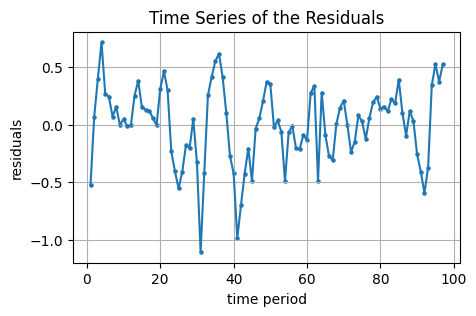

In [7]:
# Retrieve residuals of model from b)
residuals = model_with_wave.resid

# Initialize the figure to see the evolution
fig = plt.figure(figsize=(5,3))

# Plot the residuals in function of the time variable
plt.plot(fish['t'], residuals)
plt.scatter(fish['t'], residuals, s=5)

plt.xlabel('time period')
plt.ylabel('residuals')
plt.title('Time Series of the Residuals')
plt.grid()

plt.show()

***Answer:*** By examining the plot, it appears that there may be a positive autocorrelation. The residuals do not exhibit random distribution; instead, there is a noticeable tendency for them to follow a pattern. Additionally, the absence of a change in sign at each residual step time suggests a positive, and not negative, autocorrelation.

Let's dig a bit more in it by testing for AR(1) more formally with Durbin-Watson tests (c.f. Ch.4b) slide 12). Also we could check for higher autocorrelation with the Breusch-Godfrey test (c.f. Ch.4b) slide 11), but not requested by the assignment.

In [8]:
# Perform the Durbin-Watson test
durbin_watson_statistic = sm.stats.stattools.durbin_watson(residuals)

# Print the results of Durbin-Watson statistic
print(f'Durbin-Watson Statistic: {durbin_watson_statistic:.3f}')
print(f'Expected value of residuals: {residuals.mean():.3f}')

Durbin-Watson Statistic: 0.745
Expected value of residuals: -0.000


***Answer (cont'd):*** By looking at the lecture of chapter 4b) slide 13 we retrieve the approximate values of $d_L\approx1.506$ and $d_U\approx1.850$ (we choose $K=8\approx9$ and $T=97\approx100$ to retrieve these critical values). Since the statistic value of Durbin-Watson test is less than $d_U$, we reject the null stating $\rho=0$. We can statistically be confident that it exists a positive auto correlation at a $5\%$ significance level.

Presence of autocorrelation violate the A4 assumption ($Cov\{\epsilon_i, \epsilon_j\}=0$, but since we have A2 ($E(\epsilon|X)=0$) we can say that estimator are unbiased but not BLUE anymore.

Also, in this context, our usual standard errors are wrong.

(c.f. Ch4b) slide 3)

### e)

In [9]:
# Obtain Newey-West standard errors with four lags
newey_west_results = model_with_wave.get_robustcov_results(cov_type='HAC', maxlags=4)

results_data = pd.DataFrame(
    {
    'Coefficient': newey_west_results.params,
    'Standard Error': newey_west_results.bse,
    'T-Statistic': newey_west_results.tvalues,
    'P-value': newey_west_results.pvalues
}
, index=X.columns)

results_data

,Coefficient,Standard Error,T-Statistic,P-value
const,-0.920254,0.250645,-3.671539,0.000411
mon,-0.018158,0.095637,-0.189863,0.849849
tues,-0.008533,0.107378,-0.079468,0.936839
wed,0.050041,0.094109,0.531731,0.596237
thurs,0.122546,0.064364,1.903943,0.060149
t,-0.001157,0.001919,-0.603017,0.548031
wave2,0.090891,0.022388,4.059871,0.000105
wave3,0.047375,0.018676,2.536700,0.012933


***Answer:*** Both variables `wave2` and `wave3` seem to have p-values equal or smaller than the ones at step $b)$. Then, we can be as much or even more confident in the fact that their impact are statistically significant on the `lavgprc` dependant variable.

### f)

In [10]:
# First let's compute rho
residuals = model_with_wave.resid
residuals_shifted = residuals.shift(periods=1,  #shift all values and ...
                                    fill_value=residuals.iloc[-1])  #... give the last value to the first

# Perform the regression
residuals_model = sm.OLS(residuals, residuals_shifted).fit()

# Retrieve rho
rho = residuals_model.params.values.item()
print('Rho value = {:.3f}'.format(rho))

# Cochrane–Orcutt transformation
fish_transformed = pd.DataFrame()
fish_transformed['lavgprc_trans'] = fish['lavgprc'] - rho*fish['lavgprc'].shift(1)  #transform label
fish_transformed['const_trans'] = np.ones(fish_transformed.shape[0])-rho  #transform constant
independent_variable = ['mon', 'tues', 'wed', 'thurs', 't', 'wave2', 'wave3']
independent_variable_renamed = [word + "_trans" for word in independent_variable]  #rename the column properly
fish_transformed[independent_variable_renamed] = fish[independent_variable] - rho*fish[independent_variable].shift(1)  #transform independent variables

# Prais-Winsten step to retrieve transformed data for t=1
fish_transformed['lavgprc_trans'].iloc[0] = np.sqrt(1-rho**2)*fish['lavgprc'].iloc[0]
fish_transformed['const_trans'].iloc[0] = np.sqrt(1-rho**2)
for x, x_trans in zip(independent_variable,independent_variable_renamed):
    fish_transformed[x_trans].iloc[0] = np.sqrt(1-rho**2)*fish[x].iloc[0]

# Display the transformed data
print("Transformed data with Prais-Winsten method :")
display(fish_transformed)

Rho value = 0.577
Transformed data with Prais-Winsten method :


,lavgprc_trans,const_trans,mon_trans,tues_trans,wed_trans,thurs_trans,t_trans,wave2_trans,wave3_trans
0,-0.291037,0.816909,0.816909,0.000000,0.000000,0.000000,0.816909,6.126819,7.352183
1,0.210804,0.423234,-0.576766,0.000000,1.000000,0.000000,1.423234,0.674253,2.309104
2,0.329049,0.423234,0.000000,0.000000,-0.576766,1.000000,1.846468,3.116169,-0.325747
3,0.382520,0.423234,0.000000,0.000000,0.000000,-0.576766,2.269701,2.539403,2.692935
4,-0.521301,0.423234,1.000000,0.000000,0.000000,0.000000,2.692935,0.039403,0.616169
...,...,...,...,...,...,...,...,...,...
92,-0.174913,0.423234,1.000000,0.000000,0.000000,0.000000,39.937506,2.481318,1.769701
93,0.390752,0.423234,-0.576766,1.000000,0.000000,0.000000,40.360740,1.904552,1.981318
94,0.269798,0.423234,0.000000,-0.576766,1.000000,0.000000,40.783973,2.404552,2.192935
95,0.099740,0.423234,0.000000,0.000000,-0.576766,1.000000,41.207207,3.116169,1.904552


Transformation formulas from Ch 4b) slide 7 and also help of [wiki](https://en.wikipedia.org/wiki/Prais–Winsten_estimation).

Now we can perform an OLS regression on the transformed data to retrieve the Prais-Winsten estimators.

In [11]:
# Define the variables
y = fish_transformed['lavgprc_trans']  # Dependent variable
X = fish_transformed[['const_trans', 'mon_trans', 'tues_trans',
                      'wed_trans', 'thurs_trans', 't_trans',
                      'wave2_trans', 'wave3_trans']]  # Independent variables

# Perform the regression
model_with_transformed_data = sm.OLS(y, X).fit()

# Display the regression results
print(model_with_wave.summary())

                            OLS Regression Results                            
Dep. Variable:                lavgprc   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     5.699
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           1.84e-05
Time:                        22:57:43   Log-Likelihood:                -31.396
No. Observations:                  97   AIC:                             78.79
Df Residuals:                      89   BIC:                             99.39
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9203      0.190     -4.848      0.0

Now we are asked to tell if `wave2` and `wave3` are jointly statistically significant. Let's compute the correct F-test to check that.

In [12]:
# Define the variables
y = fish_transformed['lavgprc_trans']  # Dependent variable
X = fish_transformed[['const_trans', 'mon_trans', 'tues_trans', 'wed_trans',
                      'thurs_trans', 't_trans']]  # Independent variables

# Perform the regression
restricted_model_with_transformed_data = sm.OLS(y, X).fit()

# Perform the test and print the results
f_test = model_with_transformed_data.compare_f_test(restricted_model_with_transformed_data)

# Print the results
print(f"F-statistic : {f_test[0]:.3f}")
print(f"p-value : {f_test[1]:.3f}")

F-statistic : 6.305
p-value : 0.003


***Answer:*** Our test tells us that we can reject the null hypothesis (p-value = $0.3\%$). Then the variables `wave2` and `wave3` are jointly statistically significant. Let's now compute the estimated magnitude of the auto correlation in the error term.

In [13]:
# TODO: What ?? Can't understand why both residuals are equal. Then they have also same autocorrelation... Weird. I did several mistakes, surely.

# (model_with_wave.resid - model_with_transformed_data.resid).mean()
model_with_transformed_data.resid.autocorr()

0.23703190753106643

## Part 2

### g)

In [14]:
# Define the variables
y = fish['ltotqty']  # Dependent variable
X = fish[['lavgprc', 'mon', 'tues', 'wed', 'thurs', 't']]  # Independent variables

# Add a constant term for the intercept
X = sm.add_constant(X)

# Perform the regression
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                ltotqty   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     4.201
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           0.000903
Time:                        22:57:43   Log-Likelihood:                -99.132
No. Observations:                  97   AIC:                             212.3
Df Residuals:                      90   BIC:                             230.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.3011      0.203     40.935      0.0

***Answer:*** Estimator of $log(price)$ is negative, meaning the more expansive is fish, the less quantity we have.
We are trying to regress a variable with one variable that is probably strongly correlated to the quantity variable. We are in the "Simultaneity and reverse causality" part.

(c.f. Chap 5a slide 16)

### h)

***Answer:***

An instrument variable needs to fulfill two conditions :
1) relevance condition ($Cov(x_i, z_i)\neq0$)
2) exclusion restriction ($Cov(\epsilon_i, z_i)=0$)

c.f. Ch 5a slide 19

In our case, the relevance condition looks plausible. Bad maritime conditions would certainly impact the fished quantity and then the price. So both variable seem correlated to each other at a certain degree. the second condition is less tangible, but can be plausible also.

### i)

First let's try it by hand.

In [15]:
# Define the variables
y = fish['lavgprc']  # Dependent variable
X = fish[['wave2', 'mon', 'tues', 'wed', 'thurs', 't']]  # Independent variables

# Add a constant term for the intercept
X = sm.add_constant(X)

# Perform the first stage regression
first_stage_wave2 = sm.OLS(y, X).fit()

# Compute the covariance between the instrument and its endogenous variable
covariance_wave2 = np.cov(fish['wave2'], fish['lavgprc'])[0,1]

# Display the regression results
print(first_stage_wave2.summary())
print(f"Covariance between instrument and endogenous variable : {covariance_wave2:.3f}")

                            OLS Regression Results                            
Dep. Variable:                lavgprc   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     5.528
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           6.52e-05
Time:                        22:57:43   Log-Likelihood:                -34.141
No. Observations:                  97   AIC:                             82.28
Df Residuals:                      90   BIC:                             100.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7056      0.169     -4.187      0.0

***Answer:*** We choose here to work only with one instrument variable `wave2`. Then, the rull of thumb tell us that we need to check that the t-statistic is larger than 3.16 which is the case here.

### j)

In [16]:
# Define the variables
y = fish['ltotqty']  # Dependent variable
X = fish[['wave2', 'mon', 'tues', 'wed', 'thurs', 't']]  # Independent variables

# Add a constant term for the intercept
X = sm.add_constant(X)

# Perform the reduced form regression
reduced_form_wave2 = sm.OLS(y, X).fit()

# Compute new estimator and std
lavgprc_iv_estimator_wave2 = reduced_form_wave2.params.wave2/first_stage_wave2.params.wave2
variance_lavgprc_wave2 = model.bse.lavgprc
variance_lavgprc_iv_wave2 = (1/covariance_wave2)*variance_lavgprc_wave2  #std

# Display the regression results
print(reduced_form_wave2.summary())
print("==============================================================================")
print(f"Instrumental Variable estimator for log(price) = {lavgprc_iv_estimator_wave2:.5f}")
print(f"Instrument Variable variance for log(price) = {variance_lavgprc_iv_wave2:.5f}")
print(f"Instrument Variable std for log(price) = {variance_lavgprc_iv_wave2**(1/2):.5f}")

                            OLS Regression Results                            
Dep. Variable:                ltotqty   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     3.498
Date:                Mon, 27 Nov 2023   Prob (F-statistic):            0.00372
Time:                        22:57:43   Log-Likelihood:                -100.94
No. Observations:                  97   AIC:                             215.9
Df Residuals:                      90   BIC:                             233.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.9487      0.336     26.669      0.0

And now let's compute all this with a well known package [linearmodels](https://bashtage.github.io/linearmodels/iv/iv/linearmodels.iv.model.IV2SLS.html#linearmodels.iv.model.IV2SLS).

In [17]:
# Perform the regression using 2SLS approach
formula = "ltotqty ~ 1 + C(mon) + C(tues) + C(wed) + C(thurs) + t + [lavgprc ~ wave2]"
iv_2sls_wave2 = IV2SLS.from_formula(formula=formula, data=fish).fit()

# Print the results
param = iv_2sls_wave2.params["lavgprc"]
se = iv_2sls_wave2.std_errors["lavgprc"]
t_stat = iv_2sls_wave2.tstats["lavgprc"]
p_val = iv_2sls_wave2.pvalues["lavgprc"]
print(f"Parameter: {param}")
print(f"SE: {se}")
print(f"95 CI: {(-1.96*se,1.96*se) + param}")
print(f"T-statistics: {t_stat}")
print(f"P-value: {p_val}")

Parameter: -0.9603469887077409
SE: 0.4395354926589175
95 CI: [-1.82183655 -0.09885742]
T-statistics: -2.1849134023244323
P-value: 0.028895196647325205


***Answer:*** We performed the reduced form and first stage regression. Then we retrieve the IV estimator $\beta_{2,IV}$ by dividing the estimator of the reduced form by the first stage estimator (c.f. Ch5a, slide 36). We retrieve the standard error of the estimator using lecture formula (c.f. Ch5a, slide 23), but not precise then we used the estimated one from the [linearmodel](https://bashtage.github.io/linearmodels/iv/iv/linearmodels.iv.model.IV2SLS.html#linearmodels.iv.model.IV2SLS) package.

The OLS performed without instrument variable (part g) of assignment gave us an estimator $\beta_{2}=-0.5489$ that can be compared to the smaller (or larger in magnitude) $\beta_{2,IV}=-0.9604$. This difference can be explained by :
- Measurement error on `log(price)` that would attenuate effect of the variable.
- Exclusion restriction may not be satisfied.

Second, we compare the standard errors of both estimator. Estimator of OLS have a standard error of $0.184$ versus standard error of IV estimator of $0.439$. Then, IV estimator have larger standard error. Then, it is less precise than OLS estimator (c.f. Ch5a slide 23).

### k)

Begin with the reduce form regression.

In [18]:
# Define the variables
y = fish['ltotqty']  # Dependent variable
X = fish[['speed3', 'mon', 'tues', 'wed', 'thurs', 't']]  # Independent variables

# Add a constant term for the intercept
X = sm.add_constant(X)

# Perform the reduced form regression
reduced_form_speed3 = sm.OLS(y, X).fit()

# Display the regression results
print(reduced_form_speed3.summary())

                            OLS Regression Results                            
Dep. Variable:                ltotqty   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     3.955
Date:                Mon, 27 Nov 2023   Prob (F-statistic):            0.00148
Time:                        22:57:44   Log-Likelihood:                -99.757
No. Observations:                  97   AIC:                             213.5
Df Residuals:                      90   BIC:                             231.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0676      0.333     27.250      0.0

Then, compute the first stage regression.

In [19]:
# Define the variables
y = fish['lavgprc']  # Dependent variable
X = fish[['speed3', 'mon', 'tues', 'wed', 'thurs', 't']]  # Independent variables

# Add a constant term for the intercept
X = sm.add_constant(X)

# Perform the first stage regression
first_stage_speed3 = sm.OLS(y, X).fit()

# Compute new estimator and std
lavgprc_iv_estimator_speed3 = reduced_form_speed3.params.speed3/first_stage_speed3.params.speed3  #estimator
variance_lavgprc_speed3 = model.bse.lavgprc
covariance_speed3 = np.cov(fish['speed3'], fish['lavgprc'])[0,1]  #covariance
variance_lavgprc_iv_speed3 = (1/covariance_speed3)*variance_lavgprc_speed3  #std

# Display the regression results
print(reduced_form_speed3.summary())
print("==============================================================================")
print(f"Instrumental Variable estimator for log(price) = {lavgprc_iv_estimator_speed3:.5f}")
print(f"Instrument Variable variance for log(price) = {variance_lavgprc_iv_speed3:.5f}")
print(f"Instrument Variable std for log(price) = {variance_lavgprc_iv_speed3**(1/2):.5f}")

                            OLS Regression Results                            
Dep. Variable:                ltotqty   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     3.955
Date:                Mon, 27 Nov 2023   Prob (F-statistic):            0.00148
Time:                        22:57:44   Log-Likelihood:                -99.757
No. Observations:                  97   AIC:                             213.5
Df Residuals:                      90   BIC:                             231.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0676      0.333     27.250      0.0

Now, let's validate the result with the linearmodel package.

In [20]:
# Perform the regression using 2SLS approach
formula = "ltotqty ~ 1 + C(mon) + C(tues) + C(wed) + C(thurs) + t + [lavgprc ~ speed3]"
iv_2sls_speed3 = IV2SLS.from_formula(formula=formula, data=fish).fit()

# Print the results
display(HTML(iv_2sls_speed3.first_stage.summary.as_html()))
display(HTML(iv_2sls_speed3.summary.as_html()))

,lavgprc
R-squared,0.1478
Partial R-squared,0.0681
Shea's R-squared,0.0681
Partial F-statistic,7.6118
P-value (Partial F-stat),0.0058
Partial F-stat Distn,chi2(1)
==========================,===========
Intercept,-0.4436
,(-2.5420)
C(mon)[T.1],-0.0313


***Answer:*** Since the magnitude of the t-statistic of `speed3` on the `first_stage_speed3` model is $2.760$, we conclude that this instrumental variable is **weak**.

### l)

First, perform the 2SLS procedure (doc used to perform regression [here](https://matheusfacure.github.io/python-causality-handbook/08-Instrumental-Variables.html)) and display the results.

In [21]:
# Perform the regression using 2SLS approach
formula = "ltotqty ~ 1 + C(mon) + C(tues) + C(wed) + C(thurs) + t + [lavgprc ~ wave2 + speed3]"
iv_2sls_both = IV2SLS.from_formula(formula=formula, data=fish).fit()

# Print the results
display(HTML(iv_2sls_both.summary.as_html()))

Then, perform an F-test on the Instrumental Variables to test whether they jointly fulfill the criterion for being sufficiently strong instruments.

In [22]:
########## Via package function ##########
display(HTML(iv_2sls_both.first_stage.summary.as_html()))

#TODO: Understand why values are not similar

########## Compute the test by hand ##########
# Define the variables
y = fish['lavgprc']  # Dependent variable
X = fish[['wave2', 'speed3', 'mon', 'tues', 'wed', 'thurs', 't']]  # Independent variables
X_restricted = fish[['mon', 'tues', 'wed', 'thurs', 't']]  # Independent variables of restricted

# Add a constant term for the intercept
X = sm.add_constant(X)
X_restricted = sm.add_constant(X_restricted)

# Perform the first stage regression
first_stage_both = sm.OLS(y, X).fit()
first_stage_both_restricted = sm.OLS(y, X_restricted).fit()

# Retrieve the sum of square residuals of both models
ssr = (first_stage_both.resid**2).sum()
ssr_restricted = (first_stage_both_restricted.resid**2).sum()

# Compute the F-statistic
f_stat = first_stage_both.compare_f_test(first_stage_both_restricted)

# Print the results
print(f"F-statistic by hand : {f_test[0]:.3f}")
print(f"p-value by hand : {f_test[1]:.3f}")

,lavgprc
R-squared,0.2856
Partial R-squared,0.2189
Shea's R-squared,0.2189
Partial F-statistic,28.408
P-value (Partial F-stat),6.779e-07
Partial F-stat Distn,chi2(2)
==========================,===========
Intercept,-0.8458
,(-4.6044)
C(mon)[T.1],-0.0454


F-statistic by hand : 6.305
p-value by hand : 0.003


***Answer:*** Since the **F-statistic** is larger than **10** we can state that instrument are jointly sufficiently strong.

### m)

In [23]:
iv_2sls_both.sargan

Sargan's test of overidentification
H0: The model is not overidentified.
Statistic: 1.9642
P-value: 0.1611
Distributed: chi2(1)
WaldTestStatistic, id: 0x15ce78f20

### n)

In [24]:
iv_2sls_both.durbin(variables=["lavgprc"])

Durbin test of exogeneity
H0: Variables lavgprc are exogenous
Statistic: 3.4826
P-value: 0.0620
Distributed: chi2(1)
WaldTestStatistic, id: 0x15ad49670